# Challenge: make a neural network
For this challenge you have two options for how to use neural networks . Choose one of the following:

1. Use RBM to perform feature extraction on an image-based dataset that you find or create. If you go this route, present the features you extract and explain why this is a useful feature extraction method in the context you’re operating in. DO NOT USE either the MNIST digit recognition database or the iris data set. They’ve been worked on in very public ways very very many times and the code is easily available. (However, that code could be a useful resource to refer to). 

    **OR**

2. Create a multi-layer perceptron neural network model to predict on a labeled dataset of your choosing. Compare this model to either a boosted tree or a random forest model and describe the relative tradeoffs between complexity and accuracy. Be sure to vary the hyperparameters of your MLP!

Once you've chosen which option you prefer, get to modeling and submit your work below.

# Fashion MNIST

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
%matplotlib inline

C:\Users\philb\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [3]:
indices = np.random.choice(70000,1000)
X = mnist.data[indices]
y = mnist.target[indices]
X_std = StandardScaler().fit_transform(X)

In [89]:
brbm = BernoulliRBM(n_components=64, random_state=1)

In [90]:
X_brbm = brbm.fit_transform(X)

In [91]:
def comp_two_pics(idx1, idx2):
    plt.figure(figsize=(10, 10))
    plt.subplot(221)
    plt.imshow(X[idx1].reshape(28,28), cmap="gray")
    plt.subplot(223)
    plt.imshow(X[idx2].reshape(28,28), cmap="gray")
    plt.subplot(222)
    plt.imshow(X_brbm[idx1].reshape(8,8), cmap='gray')
    plt.subplot(224)
    plt.imshow(X_brbm[idx2].reshape(8,8), cmap='gray')
    plt.show()
    print('Same features: {}'.format(np.mean(X_brbm[idx1] == X_brbm[idx2])))

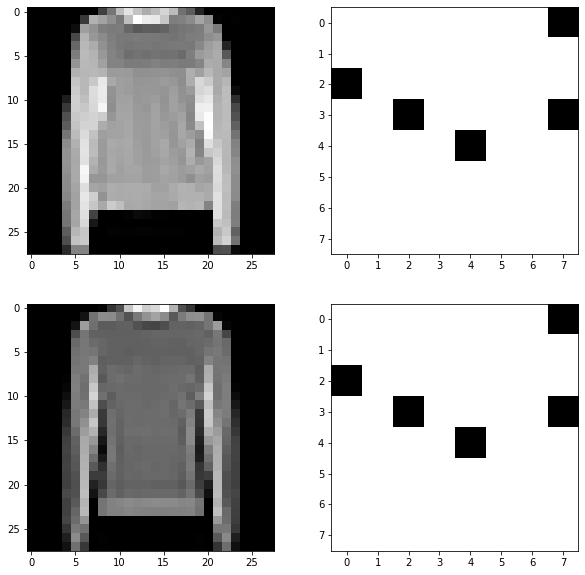

Same features: 0.984375


In [92]:
comp_two_pics(12, 132)

The data for these two images has been transformed to much simpler base components (features), let's see how a simple logistic regression does in categorizing these using the brbm transformed data.

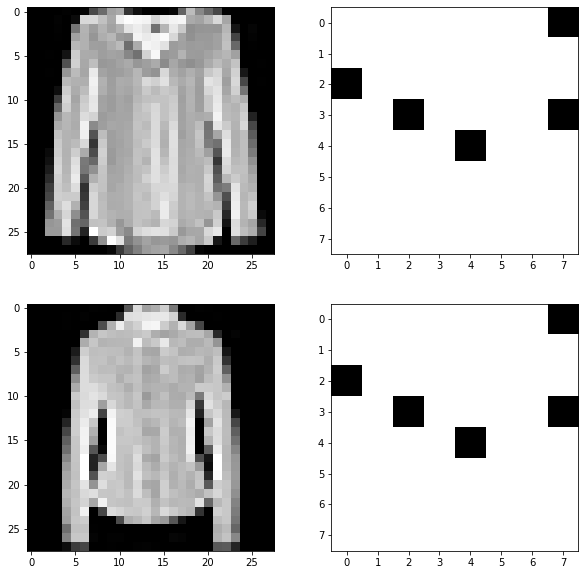

Same features: 1.0


In [93]:
comp_two_pics(0, 1)

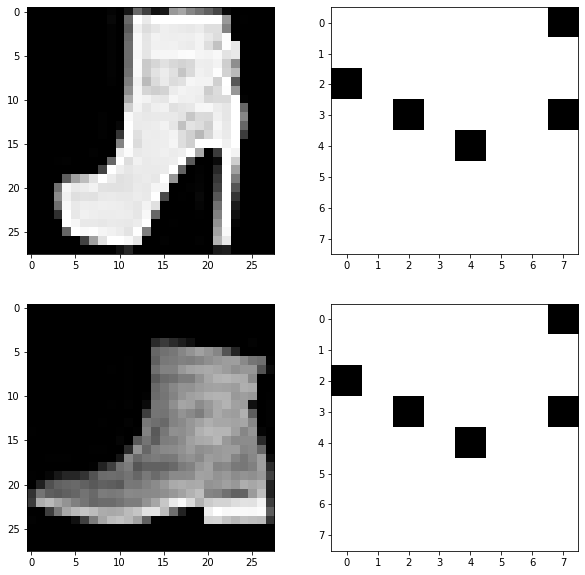

Same features: 0.984375


In [94]:
comp_two_pics(4, 7)

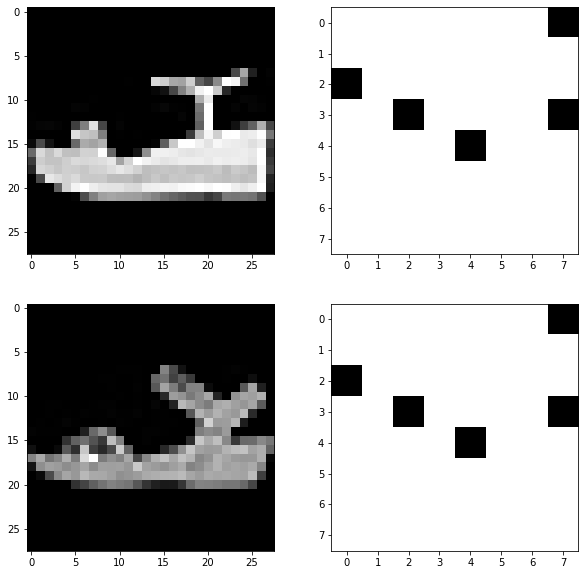

Same features: 0.921875


In [95]:
comp_two_pics(3, 6)

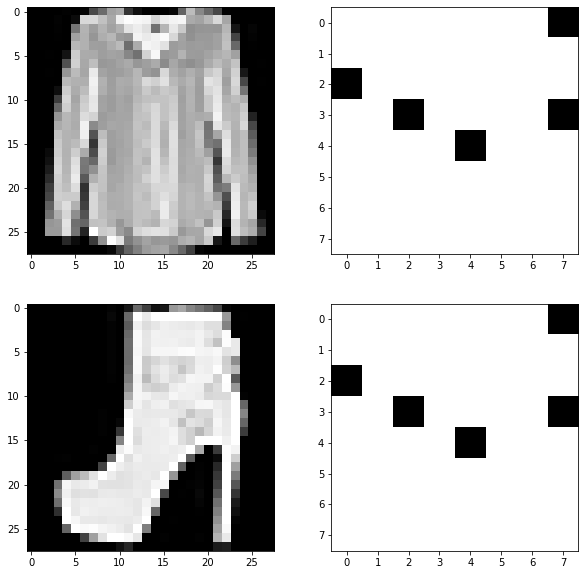

Same features: 0.984375


In [96]:
comp_two_pics(0,4)

Not very good, everyhing is similar to everything.